solution is: ['0', '9', '8', '7', '6', '1', '2', '3', '4', '5', '0']
Cost is: 363


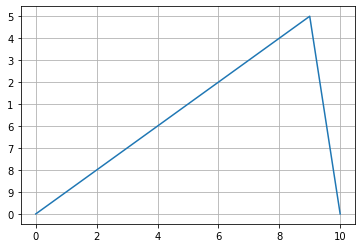

Execution time: 5.355389833450317


In [8]:
import math
from random import randint
import time
from random import shuffle
import matplotlib.pyplot as plt

###  Data Format is dict: 
#           data[node_name] = gives you a list of link info
#           data[link_index][0] = name of node that edge goes to  
#           data[link_index][1] = weight of that edge
def read_data(path):
    linkset = []
    links = {}
    max_weight = 0
    
    with open(path, "r") as f:
        for line in f:
            link = []
            tmp = line.strip().split(' ')
            link.append(int(tmp[0]))
            link.append(int(tmp[1]))
            link.append(int(tmp[2]))
            linkset.append(link)
            
            if int(tmp[2]) > max_weight:
                max_weight = int(tmp[2])
            
    
    for link in linkset:
        try:
            linklist = links[str(link[0])]
            linklist.append(link[1:])
            links[str(link[0])] = linklist
        except:
            links[str(link[0])] = [link[1:]]
        
    return links, max_weight

def getNeighbors(state):
    #return hill_climbing(state)
    return two_opt_swap(state)
        
def hill_climbing(state):
    node = randint(1, len(state)-1)
    neighbors = []
    
    for i in range(len(state)):
        if i != node and i != 0:
            tmp_state = state.copy()
            tmp = tmp_state[i]
            tmp_state[i] = tmp_state[node]
            tmp_state[node] = tmp
            neighbors.append(tmp_state)
            
    return neighbors

def two_opt_swap(state):
    global neighborhood_size
    neighbors = []
    
    for i in range(neighborhood_size):
        node1 = 0
        node2 = 0
        
        while node1 == node2:
            node1 = randint(1, len(state)-1)
            node2 = randint(1, len(state)-1)
            
        if node1 > node2:
            swap = node1
            node1 = node2
            node2 = swap
            
        
        tmp = state[node1:node2]
        tmp_state = state[:node1] + tmp[::-1] +state[node2:]
        neighbors.append(tmp_state)
        
    return neighbors

def fitness(route, graph):
    path_length = 0
    
    for i in range(len(route)):
        if(i+1 != len(route)):
            dist = weight_distance(route[i], route[i+1], graph)
            if dist != -1:
                path_length = path_length + dist
            else:
                return max_fitness # there is no  such path
                
        else:
            dist = weight_distance(route[i], route[0], graph)
            if dist != -1:
                path_length = path_length + dist
            else:
                return max_fitness # there is no  such path
            
    return path_length
            
# not used in this code but some datasets has 2-or-more dimensional data points, in this case it is usable
def euclidean_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + ((city1[1] - city2[1])**2))

def weight_distance(city1, city2, graph):
    global max_fitness
    
    neighbors = graph[str(city1)]
    
    for neighbor in neighbors:
        if neighbor[0] == int(city2):
            return neighbor[1]
        
    return -1 #there can't be minus distance, so -1 means there is not any city found in graph or there is not such edge


def tabu_search(input_file_path):
    global max_fitness, start_node
    graph, max_weight = read_data(input_file_path)
    
    ## Below, get the keys (node names) and shuffle them, and make start_node as start
    s0 = list(graph.keys())
    shuffle(s0)
    
    if int(s0[0]) != start_node:
        for i in range(len(s0)):
            if  int(s0[i]) == start_node:
                swap = s0[0]
                s0[0] = s0[i]
                s0[i] = swap
                break;
    
    # max_fitness will act like infinite fitness
    max_fitness = ((max_weight) * (len(s0)))+1
    sBest = s0
    vBest = fitness(s0, graph)
    bestCandidate = s0
    tabuList = []
    tabuList.append(s0)
    stop = False
    best_keep_turn = 0
    
    start_time = time.time()
    while not stop :
        sNeighborhood = getNeighbors(bestCandidate)
        bestCandidate = sNeighborhood[0]
        for sCandidate in sNeighborhood:
            if (sCandidate not in tabuList) and ((fitness(sCandidate, graph) < fitness(bestCandidate, graph))):
                bestCandidate = sCandidate

        if (fitness(bestCandidate, graph) < fitness(sBest, graph)):
            sBest = bestCandidate
            vBest = fitness(sBest, graph)
            best_keep_turn = 0

        tabuList.append(bestCandidate)
        if (len(tabuList) > maxTabuSize):
            tabuList.pop(0)
            
        if best_keep_turn == stoppingTurn:
            stop = True
            
        best_keep_turn += 1
        
    exec_time =  time.time() - start_time
    return sBest, vBest, exec_time
    


## Tabu Search Takes edge-list in a given format:
#nodefrom nodeto weight
#0 1 5
#3 2 4
#1 0 3
#Undirectional edges should be written 2 times for both nodes.
maxTabuSize = 10000
neighborhood_size = 400
stoppingTurn = 500
max_fitness = 0
start_node = 0
#solution, value, exec_time = tabu_search("D:\\Project Final Codes\\Project Final Codes\\Tabu-search-on-Travelling-Salesman-Problem-master\\test.txt")
solution, value, exec_time = tabu_search("D:\\Project Data\\test.txt")
solution.append('0')
print("solution is:",solution)
print("Cost is:",value)
plt.plot(solution)
plt.grid()
plt.show()
print("Execution time:",exec_time)

            
